<a href="https://colab.research.google.com/github/esmaeilifardi/LogisticRegressionCV---breast_cancer-Dataset/blob/main/Logistic_RegressionCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, classification_report
from sklearn import datasets



In [ ]:
breast_cancer = datasets.load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns= breast_cancer.feature_names)

In [ ]:
df['target']= breast_cancer.target

X = df.iloc[:, : -1]
y = df.iloc[:, -1]

In [ ]:
X.columns.value_counts().sum()

30

In [ ]:
df.keys()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7) #shuffle=True(default) 

In [ ]:
# roye dade az jense target aslan fit estefade nemikonim manande x_test hamintor baraye jense yha mananade y_train va y_test
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled  = ss.transform(X_test)          #فیت نمی کنیم چون انگاری از قبل بهش تغلب رسانده ایم به عبارتی دیتا لیکیج اتفاق نیوفتد نفوذ دیتا

In [ ]:
log_model = LogisticRegressionCV()

In [ ]:
log_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV()

In [ ]:
log_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [ ]:
log_model.C_

array([2.7825594])

In [ ]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
log_model.coef_ #zarayeb har kodam az sootoonha

array([[ 0.00210561, -0.38884472,  0.04746537, -0.15818219,  0.05425007,
         1.20926891, -1.22053476, -1.59366144, -0.00929678, -0.05381035,
        -1.92431141,  0.36156562, -0.77933608, -1.42528172,  0.35513965,
         0.54142716,  0.52684337, -0.23362588,  0.03464988,  1.1446066 ,
        -1.3188906 , -1.41488899, -0.90307804, -1.34895344, -0.93917081,
         0.42643391, -1.17208894, -1.02668119, -0.82508095, -0.77676978]])

In [ ]:
coef = pd.Series(data = log_model.coef_[0], index = X.columns )     #?????????????????? 0

In [ ]:
coef

mean radius                0.002106
mean texture              -0.388845
mean perimeter             0.047465
mean area                 -0.158182
mean smoothness            0.054250
mean compactness           1.209269
mean concavity            -1.220535
mean concave points       -1.593661
mean symmetry             -0.009297
mean fractal dimension    -0.053810
radius error              -1.924311
texture error              0.361566
perimeter error           -0.779336
area error                -1.425282
smoothness error           0.355140
compactness error          0.541427
concavity error            0.526843
concave points error      -0.233626
symmetry error             0.034650
fractal dimension error    1.144607
worst radius              -1.318891
worst texture             -1.414889
worst perimeter           -0.903078
worst area                -1.348953
worst smoothness          -0.939171
worst compactness          0.426434
worst concavity           -1.172089
worst concave points      -1

In [ ]:
coef = coef.sort_values()

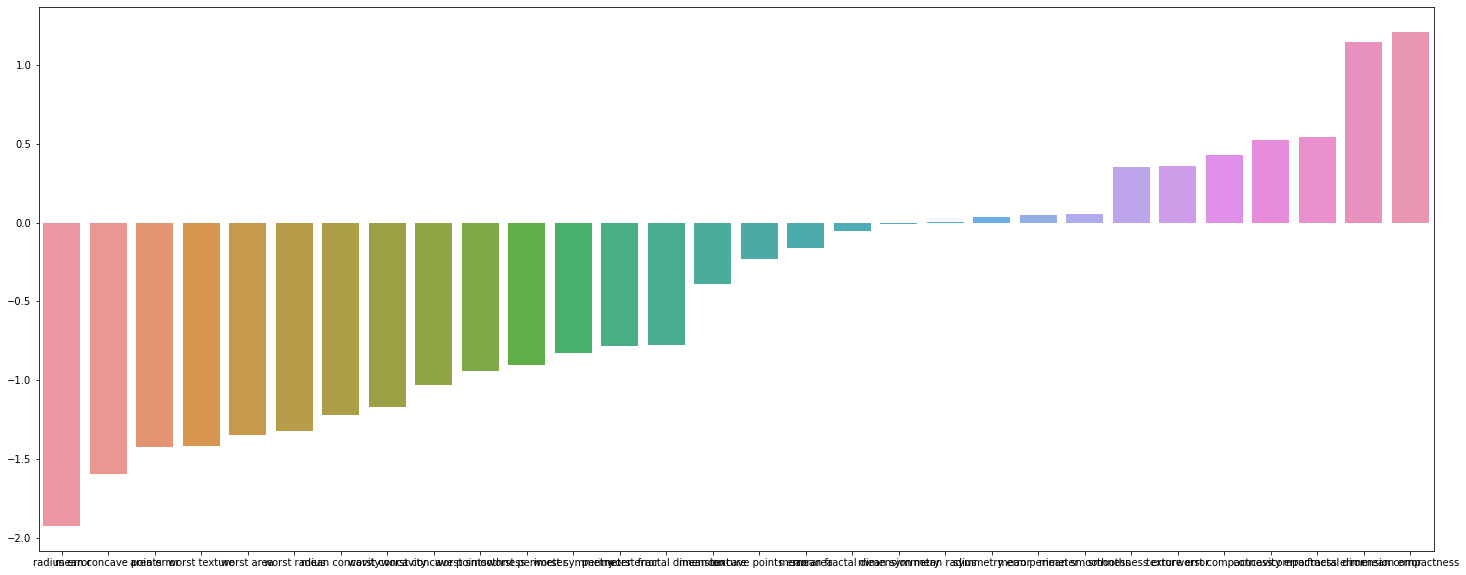

In [ ]:
plt.figure(figsize= (25, 10))
sns.barplot(x= coef.index, y= coef.values)